In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import skimage.transform as sktr
from skimage.color import rgb2gray, rgba2rgb
from scipy import signal
import cv2
import skimage.io as skio
import scipy


def get_points(im1, im2):
    p3 = (290, 325)
    p4 = (433, 325)
    p1 = (604, 286)
    p2 = (740, 369)
    return (p1, p2, p3, p4)

def recenter(im, r, c):
    R, C, _ = im.shape
    rpad = (int) (np.abs(2*r+1 - R))
    cpad = (int) (np.abs(2*c+1 - C))
    return np.pad(
        im, [(0 if r > (R-1)/2 else rpad, 0 if r < (R-1)/2 else rpad),
             (0 if c > (C-1)/2 else cpad, 0 if c < (C-1)/2 else cpad),
             (0, 0)], 'constant')

def find_centers(p1, p2):
    cx = np.round(np.mean([p1[0], p2[0]]))
    cy = np.round(np.mean([p1[1], p2[1]]))
    return cx, cy

def align_image_centers(im1, im2, pts):
    p1, p2, p3, p4 = pts
    h1, w1, b1 = im1.shape
    h2, w2, b2 = im2.shape
    
    cx1, cy1 = find_centers(p1, p2)
    cx2, cy2 = find_centers(p3, p4)

    im1 = recenter(im1, cy1, cx1)
    im2 = recenter(im2, cy2, cx2)
    return im1, im2

def rescale_images(im1, im2, pts):
    p1, p2, p3, p4 = pts
    len1 = np.sqrt((p2[1] - p1[1])**2 + (p2[0] - p1[0])**2)
    len2 = np.sqrt((p4[1] - p3[1])**2 + (p4[0] - p3[0])**2)
    dscale = len2/len1
    print(dscale)
    if dscale < 1:
        im1 = sktr.rescale(im1, dscale)
    else:
        im2 = sktr.rescale(im2, 1.0 / dscale)
    print(im1.shape)
    return im1, im2

def rotate_im1(im1, im2, pts):
    p1, p2, p3, p4 = pts
    theta1 = math.atan2(-(p2[1] - p1[1]), (p2[0] - p1[0]))
    theta2 = math.atan2(-(p4[1] - p3[1]), (p4[0] - p3[0]))
    dtheta = theta2 - theta1
    im1 = sktr.rotate(im1, dtheta*180/np.pi)
    return im1, dtheta

def match_img_size(im1, im2):
    # Make images the same size
    h1, w1, c1 = im1.shape
    h2, w2, c2 = im2.shape
    if h1 < h2:
        im2 = im2[int(np.floor((h2-h1)/2.)) : -int(np.ceil((h2-h1)/2.)), :, :]
    elif h1 > h2:
        im1 = im1[int(np.floor((h1-h2)/2.)) : -int(np.ceil((h1-h2)/2.)), :, :]
    if w1 < w2:
        im2 = im2[:, int(np.floor((w2-w1)/2.)) : -int(np.ceil((w2-w1)/2.)), :]
    elif w1 > w2:
        im1 = im1[:, int(np.floor((w1-w2)/2.)) : -int(np.ceil((w1-w2)/2.)), :]
    assert im1.shape == im2.shape
    return im1, im2

def align_images(im1, im2):
    pts = get_points(im1, im2)
    im1, im2 = align_image_centers(im1, im2, pts)
    im1, im2 = rescale_images(im1, im2, pts)
    im1, angle = rotate_im1(im1, im2, pts)
    im1, im2 = match_img_size(im1, im2)
    return im1, im2


if __name__ == "__main__":
    # 1. load the image
    # 2. align the two images by calling align_images
    # Now you are ready to write your own code for creating hybrid images!
    pass

NameError: name 'im_out' is not defined

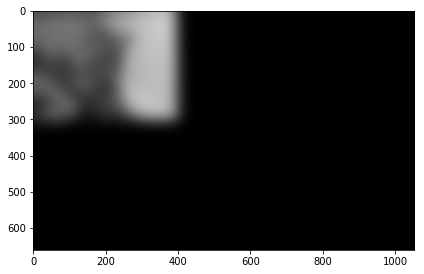

In [3]:
# First load images

# high sf
im1 = plt.imread('data/DerekPicture_raw.jpg')/255.

# low sf
im2 = plt.imread('data/nutmeg_raw.jpg')/255

#im1 = rgb2gray(im1).reshape((im1.shape[0], im1.shape[1], 1))
#im2 = rgb2gray(im2).reshape((im2.shape[0], im2.shape[1], 1))

# Next align images (this code is provided, but may be improved)
im1_aligned, im2_aligned = align_images(im2, im1)

#temp = im1_aligned + im2_aligned
#temp = temp.reshape((temp.shape[0], temp.shape[1]))
#skio.imshow(temp)
## You will provide the code below. Sigma1 and sigma2 are arbitrary 
## cutoff values for the high and low frequencies

def hybrid_image(im1, im2, sigma1, sigma2):
    #gaussian_im1_1d = cv2.getGaussianKernel(31, sigma1) 
    #gaussian_im1_2d = gaussian_im1_1d @ gaussian_im1_1d.T
    #gaussian_im2_1d = cv2.getGaussianKernel(31, sigma2) 
    #gaussian_im2_2d = gaussian_im2_1d @ gaussian_im2_1d.T
    #gaussian_im1 = scipy.ndimage.gaussian_filter(im1, sigma1)
    #gaussian_im2 = scipy.ndimage.gaussian_filter(im2, sigma2)
    gaussian_im1 = scipy.ndimage.gaussian_filter(im1, sigma1)
    gaussian_im2 = scipy.ndimage.gaussian_filter(im2, sigma2)
    skio.imshow(gaussian_im2)
    high_im2 = im2 - gaussian_im2
    #hybrid_img = high_im2 * 0.6  + gaussian_im1 * 0.4
    return gaussian_im1, high_im2
    
sigma1 = 5
sigma2 = 20
hybrid_low, hybrid_high = hybrid_image(im2_aligned, im1_aligned, sigma1, sigma2)
hybrid = hybrid_high * 0.5  + hybrid_low * 0.5
#im_out = rgb2gray(hybrid)
skio.imshow(im_out)
#skio.imsave("output/hybrid.jpg", im_out)  
#skio.imshow(hybrid)

## Compute and display Gaussian and Laplacian Pyramids
## You also need to supply this function
N = 5 # suggested number of pyramid levels (your choice)
#pyramids(hybrid, N)

In [6]:
a = rgb2gray(hybrid_low)
b = cv2.merge([a,a,a])
hybrid = hybrid_high * 0.6  + b * 0.4
#skio.imsave("output/hybrid2.jpg", hybrid)  
c = rgb2gray(hybrid_high)
d = cv2.merge([c,c,c])
hybrid = d * 0.6  + hybrid_low * 0.4
#skio.imsave("output/hybrid3.jpg", hybrid)  


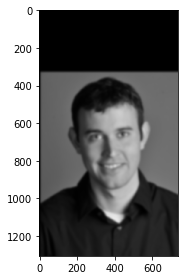

In [7]:
skio.imshow(hybrid_low)

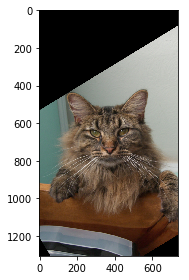

In [8]:
skio.imshow(im1_aligned)

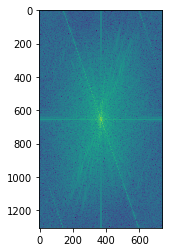

In [9]:
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(rgb2gray(im1_aligned))))))

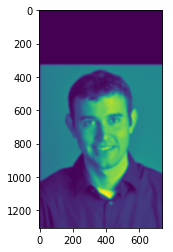

In [10]:
plt.imshow(a)

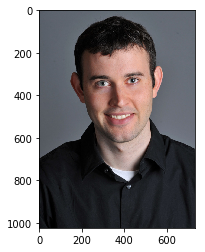

In [11]:
plt.imshow(im1)

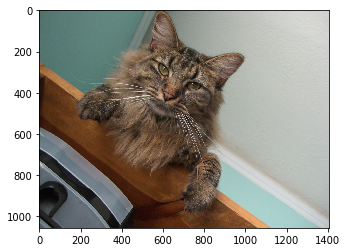

In [12]:
plt.imshow(im2)

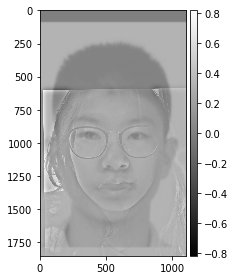

In [7]:
im1 = plt.imread('sh_raw.jpg')/255
im1 = im1[:,:, :3]
# low sf
im2 = plt.imread('sy_raw.jpg')/255
im2 = im2[:,:, :3]

def get_points(im1, im2):
    p3 = (520, 830)
    p4 = (879, 840)
    p1 = (368, 324)
    p2 = (684, 337)
    return (p1, p2, p3, p4)

def align_images(im1, im2):
    pts = get_points(im1, im2)
    im1, im2 = align_image_centers(im1, im2, pts)
    #im1, im2 = rescale_images(im1, im2, pts)
    im1, angle = rotate_im1(im1, im2, pts)
    im1, im2 = match_img_size(im1, im2)
    return im1, im2

# Next align images (this code is provided, but may be improved)
im1_aligned, im2_aligned = align_images(im1, im2)

sigma1 = 5
sigma2 = 20
hybrid_low, hybrid_high = hybrid_image(im2_aligned, im1_aligned, sigma1, sigma2)
hybrid = hybrid_high * 0.67  + hybrid_low * 0.33
im_out = rgb2gray(hybrid)
skio.imshow(im_out, cmap="gray")
#skio.imsave("output/sh_sy.jpg", hybrid)  

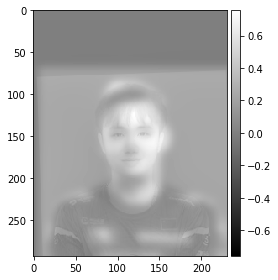

In [8]:
im1 = plt.imread('somebody.jpg')/255
im1 = im1[:,:, :3]
# low sf
im2 = plt.imread('niko.jpg')/255
im2 = im2[:,:, :3]

def get_points(im1, im2):
    p3 = (94, 79)
    p4 = (124, 78)
    p1 = (94, 70)
    p2 = (122, 70)
    return (p1, p2, p3, p4)

def align_images(im1, im2):
    pts = get_points(im1, im2)
    im1, im2 = align_image_centers(im1, im2, pts)
    #im1, im2 = rescale_images(im1, im2, pts)
    im1, angle = rotate_im1(im1, im2, pts)
    im1, im2 = match_img_size(im1, im2)
    return im1, im2

# Next align images (this code is provided, but may be improved)
im1_aligned, im2_aligned = align_images(im1, im2)

sigma1 = 5
sigma2 = 20
hybrid_low, hybrid_high = hybrid_image(im2_aligned, im1_aligned, sigma1, sigma2)
hybrid = hybrid_high * 0.2  + hybrid_low * 0.8
im_out = rgb2gray(hybrid)
skio.imshow(im_out, cmap="gray")
#skio.imsave("output/somebody_niko.jpg", hybrid)  

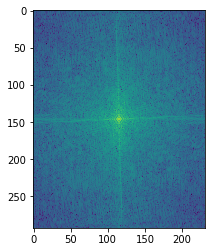

In [14]:
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(rgb2gray(im1_aligned))))))
#plt.savefig("output/somebody_fft.png")

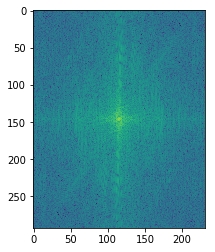

In [15]:
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(rgb2gray(im2_aligned))))))
#plt.savefig("output/niko_fft.png")

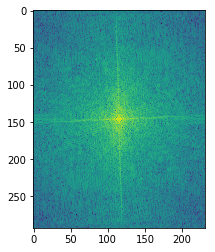

In [16]:
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(rgb2gray(hybrid_high))))))
#plt.savefig("output/somebody_high_fft.png")

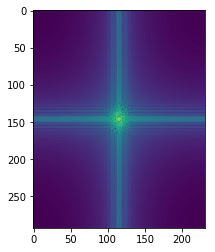

In [17]:
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(rgb2gray(hybrid_low))))))
#plt.savefig("output/niko_low_fft.png")

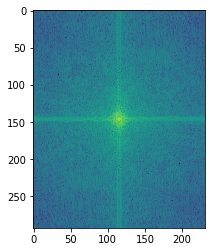

In [19]:
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(rgb2gray(hybrid))))))
#plt.savefig("output/someniko_fft.png")

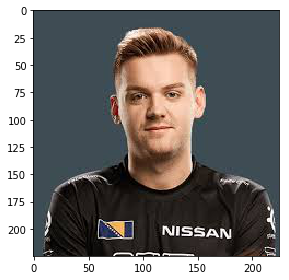

In [46]:
skio.imshow(im2)

<h1>2.3

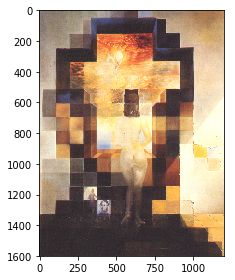

In [20]:
im_gala = plt.imread('data/gala.jpg')/255.
skio.imshow(im_gala)

In [21]:
def pyramids(im, n):
    # Gaussian Pyramids
    sigma = 1
    fig1 = plt.figure()
    for i in range(n):
        fig1.add_subplot(2, 3, i + 1)
        gaussian_img = scipy.ndimage.filters.gaussian_filter(im, sigma)
        #skio.imsave("output/gala_gaussian_"+str(i)+".jpg", gaussian_img)  
        plt.imshow(gaussian_img, cmap="gray")
        sigma *= 2
    plt.show()

    # Laplacian Pyramid
    fig2 = plt.figure()
    sigma = 1
    fig2.add_subplot(2, 3, 1)
    laplacian_img = im - scipy.ndimage.filters.gaussian_filter(im, sigma)
    #skio.imsave("output/gala_laplacian_"+str(0)+".jpg", laplacian_img)  
    plt.imshow(laplacian_img, cmap="gray")
    for i in range(n-1):
        fig2.add_subplot(2, 3, i + 2)
        laplacian_img = scipy.ndimage.filters.gaussian_filter(im, sigma) - scipy.ndimage.filters.gaussian_filter(im, sigma * 2)
        #skio.imsave("output/gala_laplacian_"+str(i+1)+".jpg", laplacian_img)  
        plt.imshow(laplacian_img, cmap="gray")
        sigma *= 2
    plt.show()

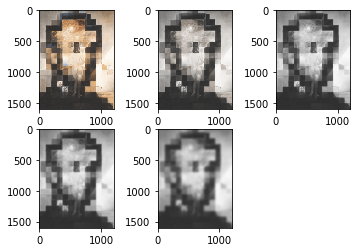

/Users/appa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: output/gala_laplacian_1.jpg is a low contrast image
/Users/appa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: output/gala_laplacian_2.jpg is a low contrast image


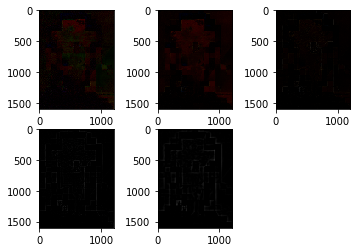

In [22]:
pyramids(im_gala, 5)

In [23]:
def pyramids(im, n):
    # Gaussian Pyramids
    sigma = 1
    fig1 = plt.figure()
    for i in range(n):
        fig1.add_subplot(2, 3, i + 1)
        gaussian_img = scipy.ndimage.filters.gaussian_filter(im, sigma)
        #skio.imsave("output/someniko_gaussian_"+str(i)+".jpg", gaussian_img)  
        plt.imshow(gaussian_img, cmap="gray")
        sigma *= 2
    plt.show()

    # Laplacian Pyramid
    fig2 = plt.figure()
    sigma = 1
    fig2.add_subplot(2, 3, 1)
    laplacian_img = im - scipy.ndimage.filters.gaussian_filter(im, sigma)
    #skio.imsave("output/someniko_laplacian_"+str(0)+".jpg", laplacian_img)  
    plt.imshow(laplacian_img, cmap="gray")
    for i in range(n-1):
        fig2.add_subplot(2, 3, i + 2)
        laplacian_img = scipy.ndimage.filters.gaussian_filter(im, sigma) - scipy.ndimage.filters.gaussian_filter(im, sigma * 2)
        #skio.imsave("output/someniko_laplacian_"+str(i+1)+".jpg", laplacian_img)  
        plt.imshow(laplacian_img, cmap="gray")
        sigma *= 2
    plt.show()

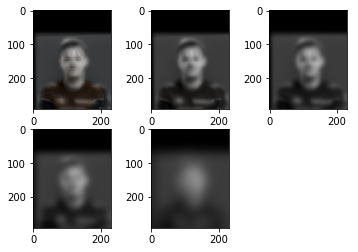

/Users/appa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: output/someniko_laplacian_0.jpg is a low contrast image
/Users/appa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: output/someniko_laplacian_1.jpg is a low contrast image
/Users/appa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: output/someniko_laplacian_2.jpg is a low contrast image


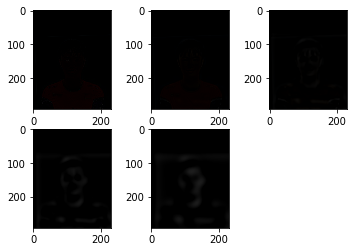

In [24]:
pyramids(hybrid, 5)

<h1>2.4

In [25]:
def pyramids2(im, n):
    # Gaussian Pyramids
    gaussian_pyramids = []
    sigma = 5
    for i in range(n):
        #print(i)
        gaussian_img = scipy.ndimage.filters.gaussian_filter(im, sigma)
        gaussian_pyramids.append(gaussian_img)
        sigma *= 4

    # Laplacian Pyramid
    laplacian_pyramids = []
    
    laplacian_img = im - gaussian_pyramids[0]
    laplacian_pyramids.append(laplacian_img)
    
    for i in range(n-1):
        #print(i)
        laplacian_img = gaussian_pyramids[i] - gaussian_pyramids[i + 1]
        laplacian_pyramids.append(laplacian_img)
        
    laplacian_img = scipy.ndimage.filters.gaussian_filter(im, sigma)
    laplacian_pyramids.append(laplacian_img)
    return gaussian_pyramids, laplacian_pyramids

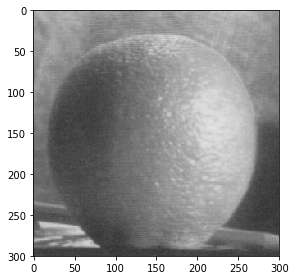

In [26]:
orange = rgb2gray(skio.imread("data/orange_raw.jpeg"))
apple = rgb2gray(skio.imread("data/apple_raw.jpeg"))
skio.imshow(orange)
mask_row = np.array([255 if i < orange.shape[1] / 2 else 0 for i in range(orange.shape[1])])
mask = np.array([mask_row.copy() for i in range(orange.shape[0])])
n = 6
mask_gaussian, _ = pyramids2(mask, n)
_, orange_laplacian_r = pyramids2(orange[:,:], n)
_, apple_laplacian_r = pyramids2(apple[:,:], n)
#_, orange_laplacian_g = pyramids2(orange[:,:,1], n)
#_, apple_laplacian_g = pyramids2(apple[:,:,1], n)
#_, orange_laplacian_b = pyramids2(orange[:,:,2], n)
#_, apple_laplacian_b = pyramids2(apple[:,:,2], n)

In [27]:
ls_r = []
for i in range(n):
    ls_r.append(mask_gaussian[i][:,:] * apple_laplacian_r[i][:,:] + (255 - mask_gaussian[i][:,:]) * orange_laplacian_r[i][:,:])



In [29]:
blended_r = ls_r[0] / max([max(j) for j in ls_r[0]]) / n
for i in range(n - 1):
    blended_r += ls_r[i + 1] / max([max(j) for j in ls_r[i]]) / n
#blended_g = ls_g[0] / max([max(j) for j in ls_g[0]]) / n
#for i in range(n - 1):
#    blended_g += ls_g[i + 1] / max([max(j) for j in ls_g[i]]) / n
#blended_b = ls_b[n - 1] / max([max(j) for j in ls_b[0]]) / n
#for i in range(4):
#    blended_b += ls_b[i + 1] / max([max(j) for j in ls_b[i]]) / n

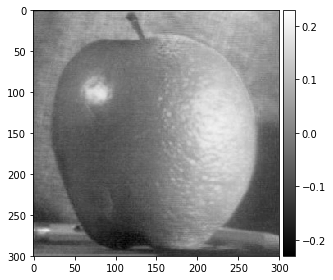

In [30]:
skio.imshow(blended_r, cmap="gray")
#skio.imsave("output/oraple.jpg", blended_r)

0
1
2
3
4
0
1
2
3
4
0
1
2
3
4


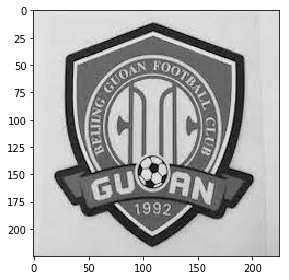

In [55]:
guoan = rgb2gray(skio.imread("data/guoan.jpg"))
jinyu = rgb2gray(skio.imread("data/jinyu.jpg"))
skio.imshow(guoan)
mask_row = np.array([255 if i < guoan.shape[1] / 2 else 0 for i in range(guoan.shape[1])])
mask = np.array([mask_row.copy() for i in range(guoan.shape[0])])
n = 6
mask_gaussian, _ = pyramids2(mask, n)
_, guoan_laplacian_r = pyramids2(guoan, n)
_, jinyu_laplacian_r = pyramids2(jinyu, n)

In [56]:
ls_r = []
for i in range(n):
    ls_r.append(mask_gaussian[i][:,:] * jinyu_laplacian_r[i][:,:] + (255 - mask_gaussian[i][:,:]) * guoan_laplacian_r[i][:,:])



In [57]:
blended_r = ls_r[0] / max([max(j) for j in ls_r[0]]) / n
for i in range(n - 1):
    blended_r += ls_r[i + 1] / max([max(j) for j in ls_r[i]]) / n

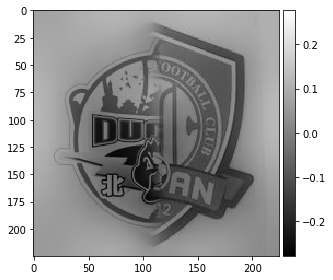

In [60]:
skio.imshow(blended_r, cmap="gray")
#skio.imsave("output/guoan_jinyu.jpg",blended_r)

/Users/appa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  


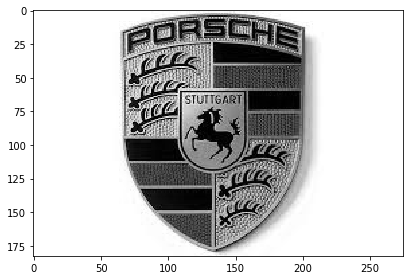

In [32]:
porche = rgb2gray(skio.imread("data/porche.jpg"))
falali = rgb2gray(skio.imread("data/falali.jpg"))
skio.imshow(porche)
mask_row = np.array([255 if i < porche.shape[1] / 2 else 0 for i in range(porche.shape[1])])
mask = np.array([mask_row.copy() for i in range(porche.shape[0])])
n = 6
mask_gaussian, _ = pyramids2(mask, n)
_, porche_laplacian_r = pyramids2(porche, n)
_, falali_laplacian_r = pyramids2(falali, n)

In [33]:
for i in range(n):
    #skio.imsave("output/porche_laplacian_"+str(i)+".jpg", porche_laplacian_r[i])  

/Users/appa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: output/porche_laplacian_4.jpg is a low contrast image
  
/Users/appa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: output/porche_laplacian_5.jpg is a low contrast image
  


In [34]:
for i in range(n):
    #skio.imsave("output/falali_laplacian_"+str(i)+".jpg", falali_laplacian_r[i]) 

/Users/appa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: output/falali_laplacian_4.jpg is a low contrast image
  
/Users/appa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: output/falali_laplacian_5.jpg is a low contrast image
  


In [35]:
ls_r = []
for i in range(n):
    ls_r.append(mask_gaussian[i][:,:] * falali_laplacian_r[i][:,:] + (255 - mask_gaussian[i][:,:]) * porche_laplacian_r[i][:,:])

In [36]:
blended_r = ls_r[0] / max([max(j) for j in ls_r[0]]) / n
for i in range(n - 1):
    blended_r += ls_r[i + 1] / max([max(j) for j in ls_r[i]]) / n

In [38]:
for i in range(n):
    #skio.imsave("output/porlali_laplacian_"+str(i)+".jpg", ls_r[i]) 

/Users/appa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: output/porlali_laplacian_4.jpg is a low contrast image
  
/Users/appa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: output/porlali_laplacian_5.jpg is a low contrast image
  


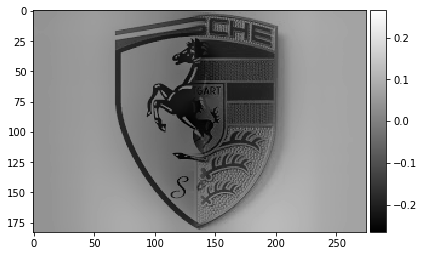

In [66]:
skio.imshow(blended_r, cmap="gray")
#skio.imsave("output/porche_falali.jpg",blended_r)

In [ ]:
#ls_g = []
#for i in range(n):
#   ls_g.append(mask_gaussian[i][:,:] * apple_laplacian_g[i][:,:] + (255 - mask_gaussian[i][:,:]) * orange_laplacian_g[i][:,:])

In [ ]:
#ls_b = []
#for i in range(n):
#    ls_b.append(mask_gaussian[i][:,:] * apple_laplacian_b[i][:,:] + (255 - mask_gaussian[i][:,:]) * orange_laplacian_b[i][:,:])

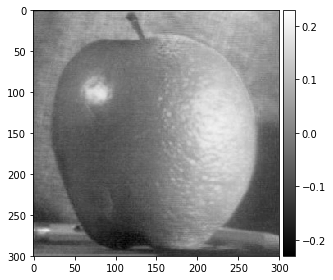

In [484]:
#final = np.empty((orange.shape[0], orange.shape[1], 3))
#final[:,:,0] = blended_r / max([max(i) for i in blended_r])
#final[:,:,1] = blended_g / max([max(i) for i in blended_g])
#final[:,:,2] = blended_b / max([max(i) for i in blended_b])